In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# better display of review text in dataframes
pd.set_option('display.max_colwidth', None) 

# Seaborn options
sns.set(style="whitegrid", font_scale=1.4)

%load_ext autoreload
%autoreload 2

# Accuracy vs Trainining data

In [2]:
import pickle

# 1. TF-IDF
tfidf_accuracies, tfidf_sizes = [], []
with open('data/tfidf_accuracies.pickle', 'rb') as reader:
    dic = pickle.load(reader)
    tfidf_accuracies = dic["test_accuracies"]
    tfidf_sizes = dic["sizes"]
    
# 2. FASTTEXT
fasttext_accuracies, fasttext_sizes = [], []
with open('data/fasttext_accuracies.pickle', 'rb') as reader:
    dic = pickle.load(reader)
    fasttext_accuracies = dic["test_accuracies"]
    fasttext_sizes = dic["sizes"]
    
# 3. RNN
rnn_accuracies, rnn_sizes = [], []
with open('data/rnn_accuracies.pickle', 'rb') as reader:
    dic = pickle.load(reader)
    rnn_accuracies = dic["test_accuracies"]
    rnn_sizes = dic["sizes"]
    
# 4. CNN
cnn_accuracies, cnn_sizes = [], []
with open('data/cnn_accuracies.pickle', 'rb') as reader:
    dic = pickle.load(reader)
    cnn_accuracies = dic["test_accuracies"]
    cnn_sizes = dic["sizes"]

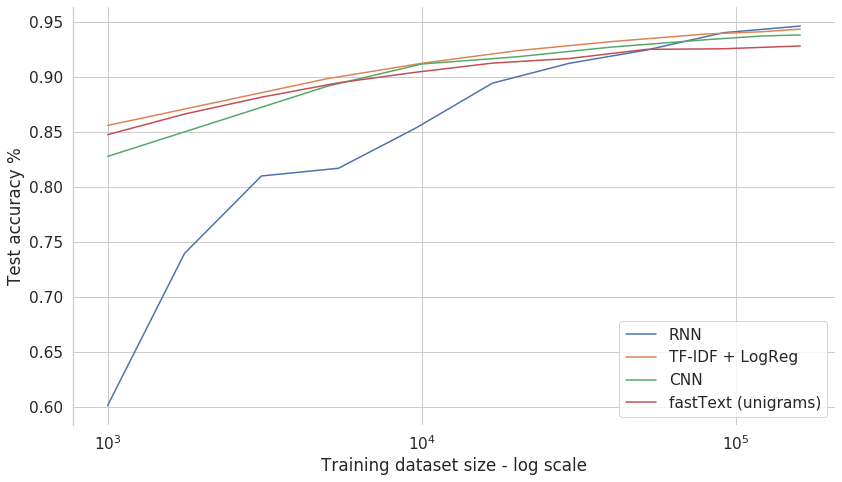

In [3]:
fig = plt.figure(figsize=(12,7))

plt.plot(rnn_sizes, rnn_accuracies)
plt.plot(tfidf_sizes, tfidf_accuracies)
plt.plot(cnn_sizes, cnn_accuracies)
plt.plot(fasttext_sizes, fasttext_accuracies)

plt.xlabel('Training dataset size - log scale')
plt.ylabel('Test accuracy %')
plt.legend(['RNN', 'TF-IDF + LogReg', 'CNN', 'fastText (unigrams)',], loc='lower right')


# Finalize the plot
sns.despine(bottom=True)
plt.xscale('log')
plt.tight_layout(h_pad=2)

# Saving plot
fig.savefig('img/results.png', dpi=200)